In [58]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [59]:
n=10
x=np.linspace(-1.0,1.0,n)
funcion = lambda xx:1/(1+25*xx**2)
y=np.array([funcion(i) for i in x])
xChe=np.array([np.cos(((2*i-1)*np.pi)/(2*n)) for i in range(1,n+1)])
yChe=np.array([funcion(i) for i in xChe])

In [60]:
''' Algoritmo que implementa el polinomio de Newton
    x: conjunto de valores en el eje x
    f: conjunto de valores en el eje y
    F[0]: coeficientes del polinomio de Newton
'''
def diferenciasDiv(x,f):
    #generamos la matriz de diferencias divididas
    F = np.zeros((len(x),len(x)))
    #la primer columna siempre son los valores de y
    for i in range(len(x)):
        F[i][0] = f[i]
    #se calcula la columna j, tomado como base la columna previa
    for j in range(1,len(x)):
        for i in range(len(x)-j):
            #se deja fija la columna y se desplaza sobre los renglones
            F[i][j] = (F[i+1][j-1]-F[i][j-1])/(x[i+j]-x[i])
    return F[0]    

In [61]:
class Interpolation:
    def __init__(self,datas):
        self.data = datas['data']
        self.n=datas['n']    
            
    def Newton(self, punto):
        x=self.data[0]; y=self.data[1]
        coef=diferenciasDiv(x,y)
        # primer valor igual al termino independiente (revisar ejemplo)
        resultado = coef[0]
        # par de ciclos para evaluar el resto de los coeficientes
        for i in range(1, len(coef)):
            # siguiente coeficiente
            evaluacion = coef[i]
            # ciclo que evalua (x-xj)
            for j in range(i):
                evaluacion *= (punto-x[j])
            # se suma el resultado a lo ya calculado
            resultado += evaluacion
        # se devuelve el resultado
        return resultado

In [62]:
datas={'data':(x,y),'n':len(x)-1}
datas1={'data':(xChe,yChe),'n':len(x)-1}

In [63]:
xp=np.linspace(-1.0,1.0,60)
yp=np.array([Interpolation(datas).Newton(i) for i in xp])
yp1=np.array([Interpolation(datas1).Newton(i) for i in xp])
yr=np.array([funcion(i) for i in xp])

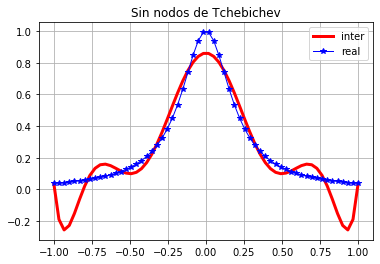

In [64]:
plt.plot(xp,yp,'red',lw=3,label='inter')
plt.plot(xp,yr,'blue',lw=1,marker='*',label='real')
plt.title("Sin nodos de Tchebichev")

plt.grid()
plt.legend()

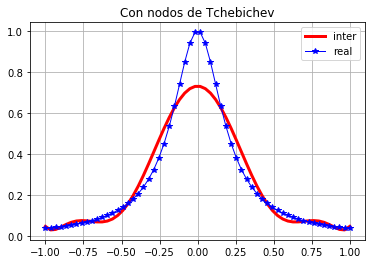

In [65]:
plt.plot(xp,yp1,'red',lw=3,label='inter')
plt.plot(xp,yr,'blue',lw=1,marker='*',label='real')
plt.title("Con nodos de Tchebichev")

plt.grid()
plt.legend()